# Laboratorio Parte 1


In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score


In [ ]:
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


2. Análisis exploratorio de datos (EDA)
Realice un EDA completo sobre el dataset:
• Distribuciones de las variables.
• Estadísticos descriptivos.
• Correlaciones entre variables.
• Relación entre variables predictoras y el target.
Cada gráfico o estadística debe ir acompañado de una
interpretación detallada, en la cual explique qué información
aporta al problema de ML.

## 2. Análisis Exploratorio de Datos (EDA)

Realice un **EDA completo** sobre el dataset, considerando los siguientes puntos:

- **Distribuciones de las variables**  
  Analice los histogramas de cada variable para identificar patrones, concentraciones, posibles valores atípicos y sesgos en los datos.

- **Estadísticos descriptivos**  
  Presente medidas como media, mediana, desviación estándar, mínimos y máximos para cada variable, lo que permite resumir la información central y la dispersión.

- **Correlaciones entre variables**  
  Use matrices de correlación para identificar relaciones lineales fuertes o débiles entre variables, lo que puede ayudar a detectar redundancias o variables influyentes.

- **Relación entre variables predictoras y el target**  
  Explore cómo las variables independientes se relacionan con la variable objetivo (`TenYearCHD`) para entender qué factores son más relevantes para predecir el riesgo coronario.

> Cada gráfico o estadística debe ir acompañado de una **interpretación detallada**, explicando qué información aporta al problema de Machine Learning y cómo puede influir en el rendimiento del modelo.


In [ ]:
## Información general de los datos
df.info() # tipos de variables, extención de la base de datos
df.isnull().sum()# variables nulas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
#estadisticos descriptivos
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


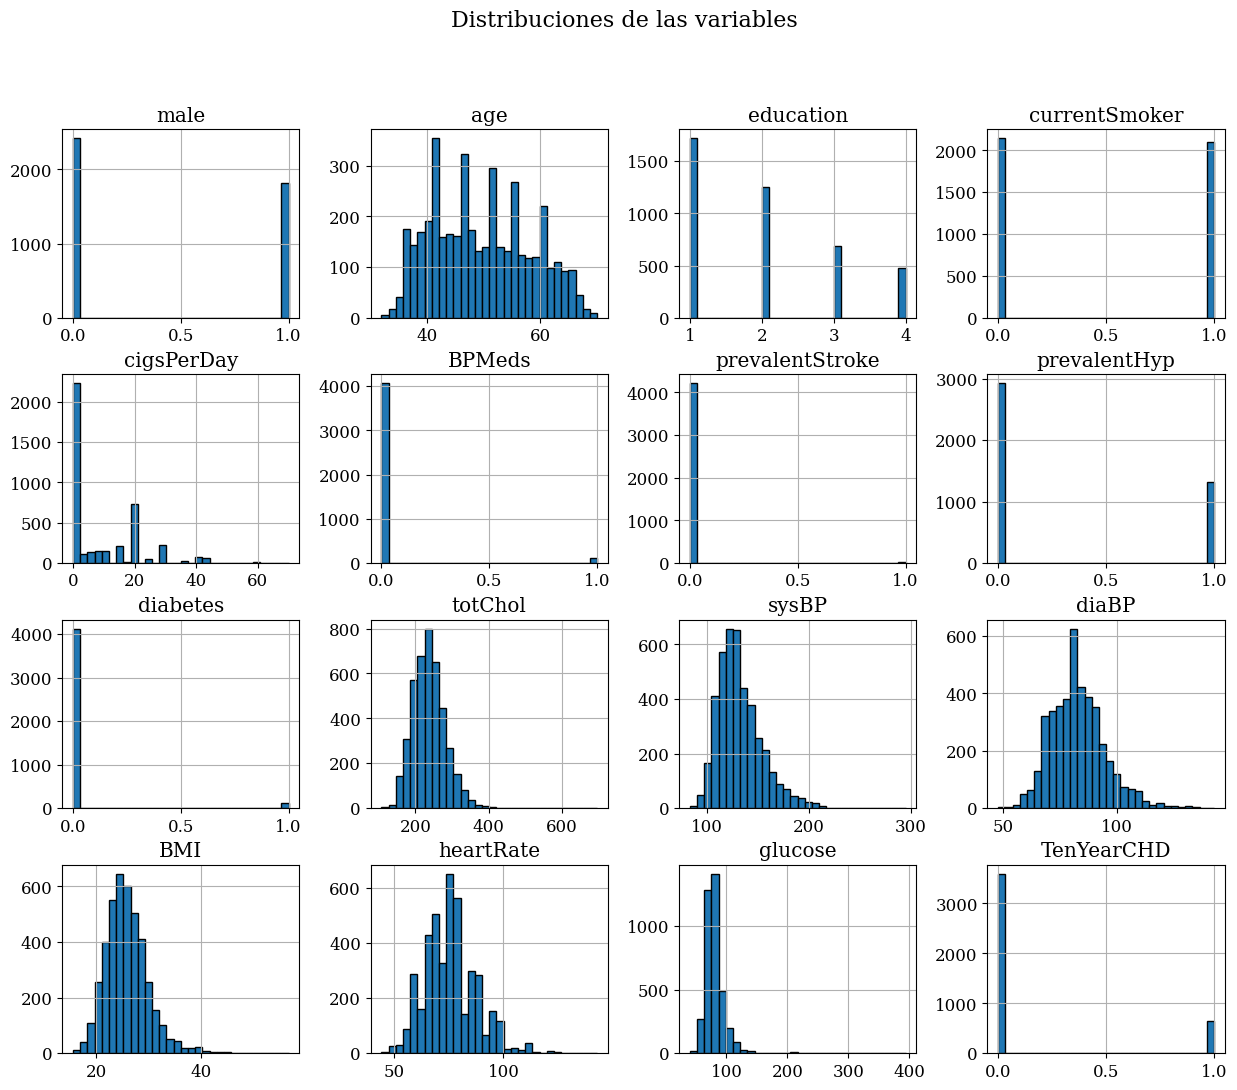

In [86]:
#discribucion de las variables.
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Distribuciones de las variables", fontsize=16)
plt.show()

### Análisis de Distribución

A partir de los histogramas, se puede observar que algunas categorías presentan una **buena distribución de datos**, como ocurre con la variable `age`, que muestra una concentración equilibrada en las edades medias. Sin embargo, esto puede generar **sesgo** al evaluar pacientes con edades menores a 30 o mayores a 70 años, ya que están poco representados en el dataset.

Por otro lado, existen categorías que posiblemente **no aporten un peso significativo** al momento de entrenar el modelo, como `diabetes`, `prevalentStroke` y, en cierto sentido, la variable objetivo `TenYearCHD`. Al analizar el target, se observa claramente que está **desbalanceada**, lo que sugiere que el modelo podría tener dificultades para hacer **predicciones precisas**, especialmente en la clase minoritaria.


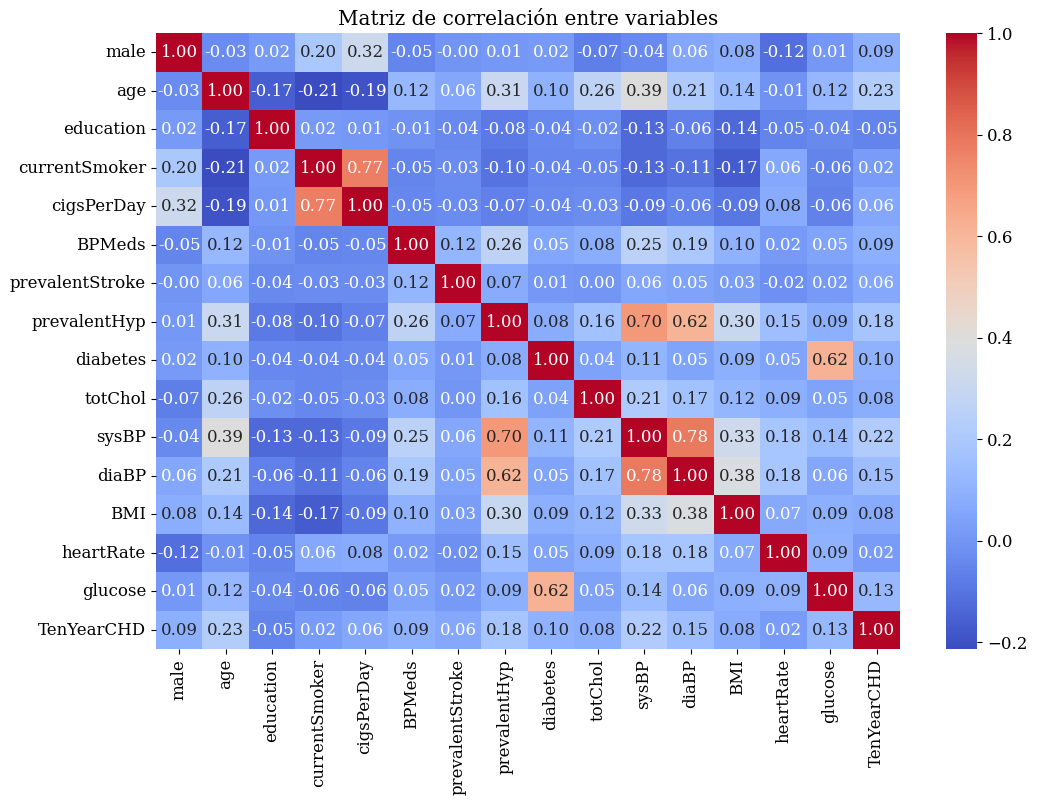

In [87]:
## relacion entre las variables.#

corr = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación entre variables")
plt.show()


     

### Relación entre Variables

El riesgo de enfermedad coronaria a 10 años (`TenYearCHD`) está principalmente relacionado con **edad** y **presión arterial sistólica**, mientras que otras variables tienen una **influencia más débil**.  

Existen fuertes correlaciones internas, como entre **tabaquismo** y **número de cigarrillos**, o entre **diabetes** y **glucosa**, que conviene controlar en el modelo para **evitar multicolinealidad**.

En la **matriz de correlación**, las variables que aparecen en **rojo** muestran una **correlación positiva fuerte**, lo que indica que están fuertemente relacionadas entre sí y que podrían **simplificarse o combinarse** en el modelo.


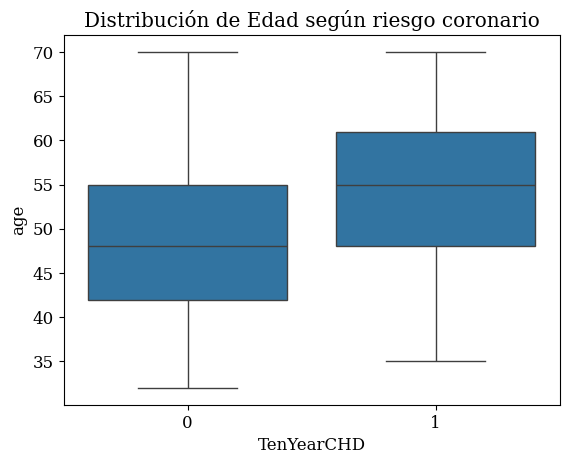

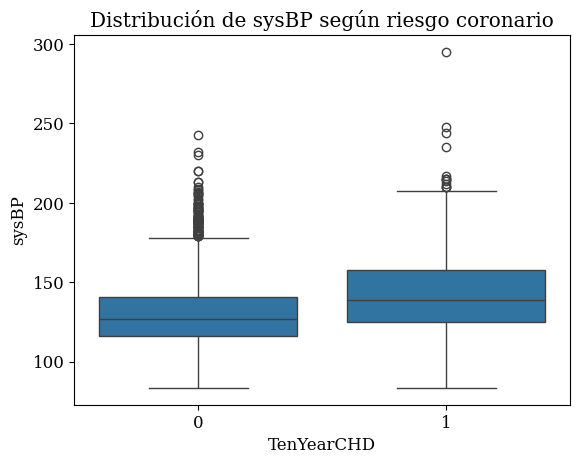

In [ ]:

sns.boxplot(x="TenYearCHD", y="age", data=df)
plt.title("Distribución de Edad según riesgo coronario")
plt.show()

sns.boxplot(x='TenYearCHD', y='sysBP', data=df)
plt.title("Distribución de sysBP según riesgo coronario")
plt.show()

## 3. Procesamiento de datos

Aplique buenas prácticas de procesamiento y limpieza de datos:

- Manejo de valores nulos.
- Codificación de variables categóricas.
- Normalización o estandarización si aplica.
- Reducción de dimensionalidad si se justifica.

Implemente un pipeline de procesamiento con scikit-learn.  
Divida los datos en X_train, X_val y X_test con proporciones justificadas (ej. 70/15/15).



In [138]:
# menejo de valores nulos#
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

columns_to_fill = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']

for col in columns_to_fill:
    df[col] = df[col].fillna(df[col].median())
valores_faltantes=df.isnull().sum()

##normalizacion del conjunto de datos

scaler = StandardScaler()

col_numericas = df.columns.drop('TenYearCHD')  # no escalar el target

df[col_numericas] = scaler.fit_transform(df[col_numericas])
x=df[col_numericas] #convertir a un dataframe para que no me salga error de dimenciones
target= df['TenYearCHD'] #acá queda gaurdado el target

## aplicacion del pipeline aca
pipeline = Pipeline([
    ('scaler', StandardScaler())  # paso de estandarización
])
# separar X_train (70%) y X_temp (30% restante)
X_train, X_temp, y_train, y_temp = train_test_split(
    x, target, test_size=0.30, random_state=42, stratify=target
)

#separar X_temp en X_val y X_test (cada uno 15% del total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Ajustar el pipeline SOLO con train
X_train_scaled = pipeline.fit_transform(X_train)
X_val_scaled = pipeline.transform(X_val)
X_test_scaled = pipeline.transform(X_test)



### Análisis de Procesamiento de Datos

Se realizó una **limpieza de los datos**, rellenando los valores faltantes con la **media de cada variable**, lo que permite evitar errores al manejar los datos durante la división en conjuntos de entrenamiento y prueba.

No se aplicó **codificación de variables categóricas**, ya que la base de datos está compuesta únicamente por **variables numéricas**, tanto continuas como binarias.

Además, todos los conjuntos de datos fueron **normalizados** para escalar las variables a un rango similar, exceptuando la **variable objetivo (`TenYearCHD`)**, que se mantuvo en su forma original.


## 4. Entrenamiento de Modelos

### a. Entrenamiento y evaluación

Se entrenaron y evaluaron **al menos 3 modelos distintos** sobre el dataset:

- **k-Nearest Neighbors (kNN)**
- **Modelo de ensamble** (Random Forest o Gradient Boosting)
- **Deep Neural Network (DNN)** (mínimo 3 capas ocultas, con funciones de activación y regularización)

Los resultados se presentan en una **tabla comparativa generada en Python**, donde se evidencia el desempeño de cada modelo en **X_train, X_val y X_test**.


In [139]:
# a. entrenamiento y evaluacion de los modelos

from sklearn.metrics import  confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score
import tensorflow as tf

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
#predicciones 
y_pred_train = knn.predict(X_train)  
y_pred_val   = knn.predict(X_val)    
y_pred_test  = knn.predict(X_test)

# Ejemplo con tus predicciones
print("f1 score(train): ", f1_score(y_train, y_pred_train))
print("f1 score(val): ", f1_score(y_val, y_pred_val))
print("f1 score:(test) :",f1_score(y_test, y_pred_test),"\n")


print("accuracy (train):", accuracy_score(y_train, y_pred_train))
print("accuracy (val):  ", accuracy_score(y_val, y_pred_val))
print("accuracy(test): ", accuracy_score(y_test, y_pred_test))






f1 score(train):  0.15139442231075698
f1 score(val):  0.11009174311926606
f1 score:(test) : 0.0594059405940594 

accuracy (train): 0.856372218476062
accuracy (val):   0.8474842767295597
accuracy(test):  0.85062893081761


In [140]:
#▪ Modelo de ensamble Random Forest 
from tensorflow import keras
from sklearn.datasets import fetch_openml

random_state=24
plt.rc('font', family='serif', size=12)

model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(15,), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1, activation='sigmoid')  # salida binaria
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
#entrenamiento del modelo
model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=10,
    verbose=0,
    validation_data=(X_val, y_val)
)
# Probabilidades predichas (entre 0 y 1)
y_pred_train_proba = model.predict(X_train)
y_pred_val_proba   = model.predict(X_val)
y_pred_test_proba  = model.predict(X_test)

# Convertir a clases (0 o 1) con un umbral de 0.5
y_pred_tr = (y_pred_train_proba > 0.5).astype(int)
y_pred_v   = (y_pred_val_proba > 0.5).astype(int)
y_pred_t  = (y_pred_test_proba > 0.5).astype(int)

print("f1 score(train): ", f1_score(y_train, y_pred_tr))
print("f1 score(val): ", f1_score(y_val, y_pred_v))
print("f1 score:(test) :",f1_score(y_test, y_pred_t),"\n")


print("accuracy (train):", accuracy_score(y_train, y_pred_tr))
print("accuracy (val):  ", accuracy_score(y_val, y_pred_v))
print("accuracy(test): ", accuracy_score(y_test, y_pred_t))

c:\Users\sara\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
f1 score(train):  0.0
f1 score(val):  0.0
f1 score:(test) : 0.0 

accuracy (train): 0.8479433580579906
accuracy (val):   0.8474842767295597
accuracy(test):  0.8490566037735849


In [141]:
# random forest
rf = RandomForestClassifier(
    n_estimators=1
    ,     # número de árboles
    max_depth=None,       # profundidad (None = crece hasta separar todo)
    random_state=24,
    n_jobs=-1             # usar todos los núcleos
)
rf.fit(X_train, y_train)

# Predicciones
y_pred_train_rf = rf.predict(X_train)
y_pred_val_rf   = rf.predict(X_val)
y_pred_test_rf  = rf.predict(X_test)


print("f1 score(train): ", f1_score(y_train, y_pred_train_rf))
print("f1 score(val): ", f1_score(y_val, y_pred_val_rf))
print("f1 score:(test) :",f1_score(y_test, y_pred_test_rf),"\n")


print("accuracy (train):", accuracy_score(y_train, y_pred_train_rf))
print("accuracy (val):  ", accuracy_score(y_val, y_pred_val_rf))
print("accuracy(test): ", accuracy_score(y_test, y_pred_test_rf))


f1 score(train):  0.7195402298850575
f1 score(val):  0.24598930481283424
f1 score:(test) : 0.15217391304347827 

accuracy (train): 0.9177343223196224
accuracy (val):   0.7783018867924528
accuracy(test):  0.7547169811320755


### Análisis de los Desempeños del Modelo

- **¿Cuál modelo tuvo mejor desempeño?**  
  El modelo que tuvo un mejor desempeño fue **Random Forest**, ya que al analizar las métricas mostró mayor capacidad para predecir los casos con posible riesgo coronario.

- **¿Alguno presentó overfitting o underfitting? ¿Cómo lo detectó?**  
  Todos los modelos presentaron **overfitting**, ya que las métricas mostraban un desempeño muy alto en el conjunto de entrenamiento, pero al evaluar la predicción en los otros subconjuntos se observaba una tendencia a predecir incorrectamente.  

  Esto puede deberse a que aproximadamente el **85% de los datos corresponden a pacientes sin riesgo coronario**, mientras que solo el **15% corresponden a pacientes con riesgo**. Este desbalance hace que los modelos tengan un accuracy aparentemente alto, pero su foco se desplaza hacia la **clase mayoritaria**, dejando de lado la **clase minoritaria**, que es precisamente la de interés para la predicción del riesgo coronario.

- **¿Cuál seleccionaría para producción y por qué?**  
  Si bien todos los modelos presentaron un rendimiento relativamente bajo en la predicción de pacientes con riesgo, el que mostró **mejores métricas fue Random Forest**. Este modelo puede ser seleccionado para producción, ya que supera la capacidad de predicción de los otros modelos, lo que permite una **mayor probabilidad de detectar pacientes con el target de interés**.




5. Prueba con muestra artificial
Genere una muestra artificial (nueva) con características
inventadas, ingrésela al modelo seleccionado y analice la
predicción. 

In [142]:
#random forest
muestra = np.array([[1, 68, 1, 1, 25, 1, 0, 1, 1, 310, 165, 100, 33.5, 92, 150]])

# Escalar muestra
muestra_escalada= scaler.transform(muestra)
# Predicción
pred = rf.predict(muestra_escalada)
print(pred)

[1]


c:\Users\sara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sara\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### ¿El resultado tiene sentido?

Como era de esperarse, el resultado no fue el óptimo. Dado que el modelo no tiene una buena predicción de la **clase minoritaria**, es comprensible que prediga principalmente **pacientes sanos**, incluso cuando la muestra presenta valores elevados en las variables más relevantes para identificar pacientes de riesgo.

### ¿Qué pasaría si modificara una o más variables de la muestra?

Como se evidencia en el comportamiento del modelo con la muestra que presenta valores elevados en variables clave para predecir riesgo coronario, es posible que al **disminuir el peso de estas categorías**, el modelo deje de identificar correctamente a los pacientes con riesgo.

Por otro lado, si se quisiera **aumentar el peso de las variables más relevantes**, habría que introducir valores que sean **biológicamente plausibles** para que el modelo genere una predicción correcta. Sin embargo, esta opción no es viable, ya que modificar los datos de manera artificial más allá de lo real podría generar **predicciones irreales o no confiables**.



In [144]:
pipeline

,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
